# Load the file from the dataset

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
import tensorflow
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

(981, 48, 48, 3)

# Split the dataset into test , train

In [8]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2)

# Data Augmentaion


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator_with_aug = ImageDataGenerator(horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1)
data_generator_no_aug = ImageDataGenerator()

train_generator=data_generator_with_aug.flow(X_train,y_train)
validation_generator=data_generator_with_aug.flow(X_test,y_test)

# CNN Model to predict the Mood 

In [10]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

model=Sequential()
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
history=model.fit_generator(train_generator,epochs=20,validation_data=validation_generator)


Epoch 1/20
25/25 [==============================] - 15s 619ms/step - loss: 0.3372 - accuracy: 0.8788 - val_loss: 0.1393 - val_accuracy: 0.9391
Epoch 2/20
25/25 [==============================] - 15s 590ms/step - loss: 0.3493 - accuracy: 0.8941 - val_loss: 0.1362 - val_accuracy: 0.9442
Epoch 3/20
25/25 [==============================] - 15s 601ms/step - loss: 0.2834 - accuracy: 0.9171 - val_loss: 0.1178 - val_accuracy: 0.9543
Epoch 4/20
25/25 [==============================] - 16s 621ms/step - loss: 0.3280 - accuracy: 0.8941 - val_loss: 0.1593 - val_accuracy: 0.9340
Epoch 5/20
25/25 [==============================] - 15s 604ms/step - loss: 0.3259 - accuracy: 0.8814 - val_loss: 0.0892 - val_accuracy: 0.9746
Epoch 6/20
25/25 [==============================] - 15s 588ms/step - loss: 0.2846 - accuracy: 0.9082 - val_loss: 0.1335 - val_accuracy: 0.9442
Epoch 7/20
25/25 [==============================] - 15s 615ms/step - loss: 0.3167 - accuracy: 0.8827 - val_loss: 0.1176 - val_accuracy: 0.9543

# Plot the Graph to check the how good the model is working

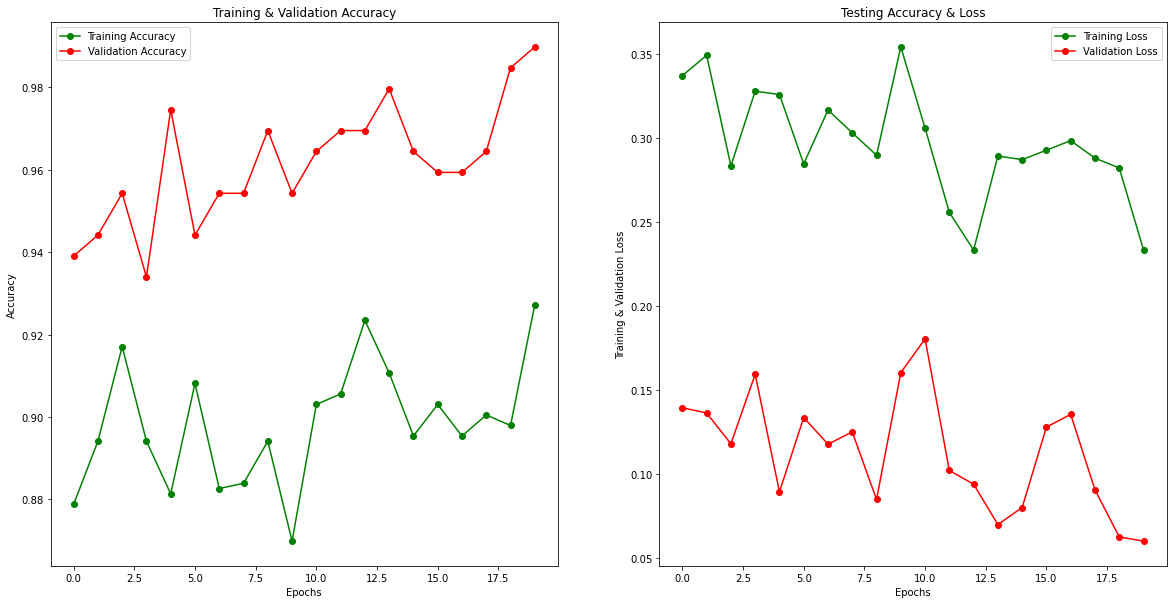

In [35]:
import matplotlib.pyplot as plt
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Creating Confusion Matrix to know the performance of Model

In [36]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

In [37]:
label = ['anger','contempt','disgust','fear','happy','sadness','surprise']
labels = {0 : 'anger', 1 : 'contempt', 2 : 'disgust', 3 : 'fear', 4 : 'happy',5 :'sadness',6 :'surprise'}


In [38]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label,
                     columns = label
                    )

In [39]:
final_cm = cm_df

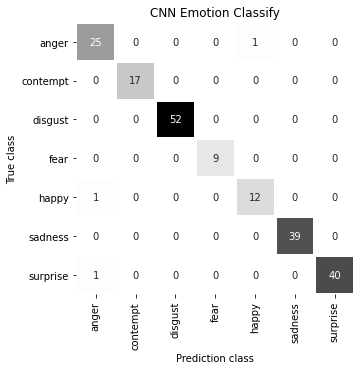

In [40]:
import seaborn as sns

plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
import cv2 
face_clsfr=cv2.CascadeClassifier('haarscade_frontalface_default.xml')

In [ ]:
size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(48,48))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,48,48,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        answer = model.predict_classes(test_image)

        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),(0, 0, 225),2)
        cv2.rectangle(im,(x,y-40),(x+w,y),(0, 0, 225),-1)
        cv2.putText(im,labels[label] , (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

# To Predict on Single Image

Actual class: contempt
Predicted Class: contempt


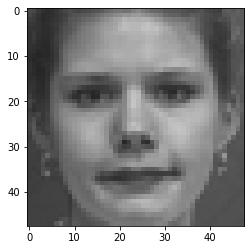

In [49]:
import random
from glob import glob
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image 
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))
    
    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = model.predict_classes(x)
    pred = model.predict(x)
    label=np.argmax(pred,axis=1)[0]   
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])
        
choose_image_and_predict()
